# Estudos do Capítulo 4


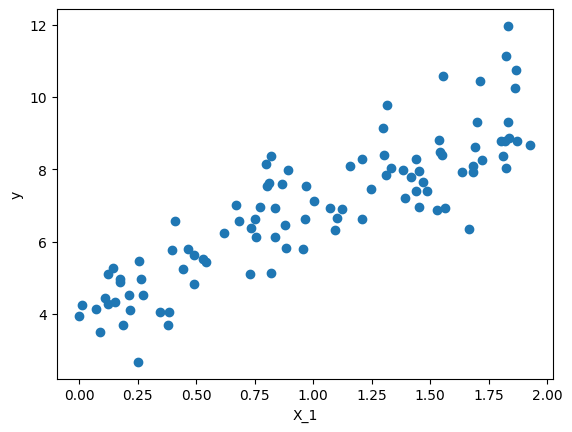

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel("X_1")
plt.ylabel("y")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best # Esperamos theta_1 = 4 e theta_2 = 3

array([[4.09671339],
       [2.80947618]])

In [6]:
# now we can make predictions using theta best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

y_predict

array([[4.09671339],
       [9.71566575]])

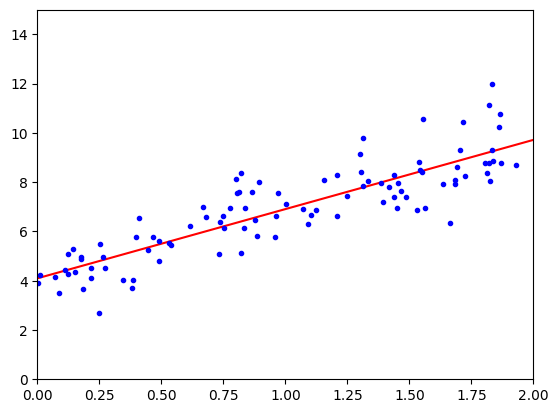

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.09671339]), array([[2.80947618]]))

In [9]:
lin_reg.predict(X_new)

array([[4.09671339],
       [9.71566575]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.09671339],
       [2.80947618]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.09671339],
       [2.80947618]])

Implementing Batch Gradient Descent


In [12]:
lr = 0.001 # learning rate
n = 10000 # iterations
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients

theta

array([[4.02309617],
       [2.87159533]])

Stochastic Gradient Descent


In [13]:
epochs = 500
t0, t1 = 5, 50 # learning schedule hyperparameters
eta = 0.1
m = 100

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients

theta

array([[4.09653667],
       [2.81325196]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_


(array([4.08524432]), array([2.8283319]))

Polynomial Regression


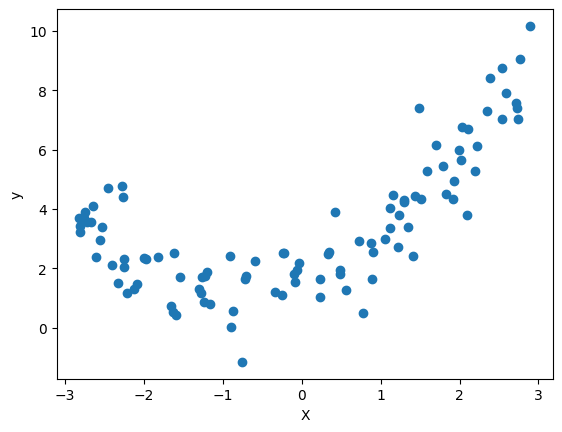

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2+ np.random.randn(m, 1)\

plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.48335948])

In [17]:
X_poly[0]

array([0.48335948, 0.23363638])

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.61407597]), array([[0.89781233, 0.57851598]]))

Learning Curves


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train loss")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val loss")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.grid(visible=True)
    plt.show()
    

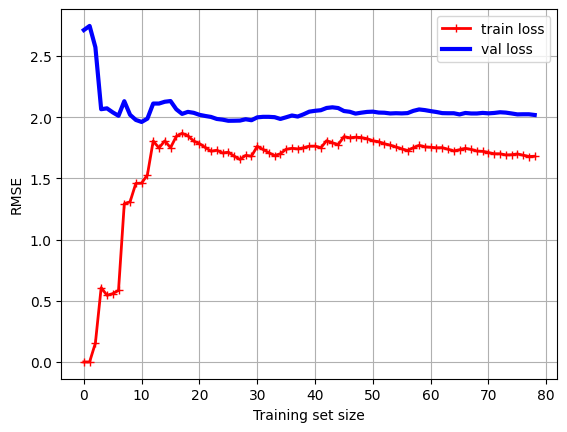

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

We can see here that the model is **underfitting**: both curves are hitting a plateau and not minimizing RMSE enough


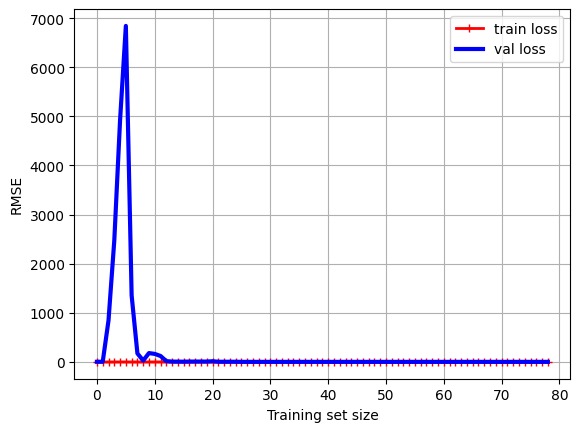

In [21]:
# trying with a 10-th degree polinomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

Clearly here, the model is **overfitting** both curves are going straight to zero.


Regularization


Ridge


In [23]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

ridge_reg.predict([[1.5]])


array([4.62127642])

In [24]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.60589677])

Lasso


In [25]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.5758947])

Elastic Net


In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.24468399])

Early Stopping


In [33]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) # warm start = True continues training where it left off
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

/mnt/c/Users/rlvv/My Private Documents/0. Raphael - Pessoal/specialization/hands_on_machine_learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/mnt/c/Users/rlvv/My Private Documents/0. Raphael - Pessoal/specialization/hands_on_machine_learning/venv/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/mnt/c/Users/rlvv/My Private Documents/0. Raphael - Pessoal/specialization/hands_on_machine_learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [36]:
best_epoch, minimum_val_error

(133, 1.4407568157086017)